In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

### Lab Task 1

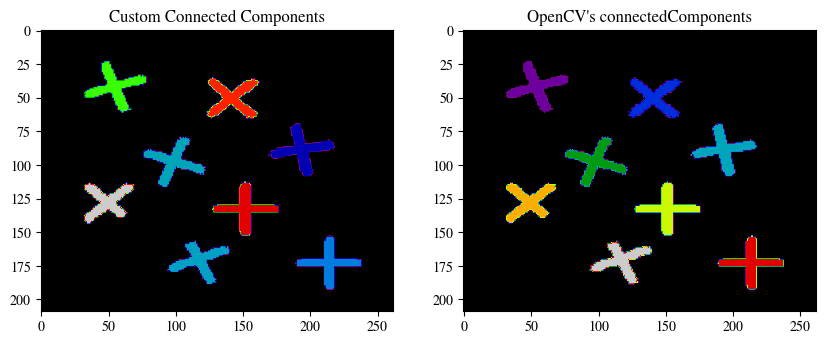

In [2]:
"""
1. Read “cc.png” from directory.
2. Apply connected component labelling using 4 connectivity and count total number of objects in
   the list. (which means write your own function from scratch!)
    HINT1: the image is a binary image with background (black portion) has numeric value of 1 while 
           the white objects have numeric values of 255
    HINT2: you can use two-pass algorithm from the Algorithm 1 (which doesn't use a specialized     
           data structure and simply use two for loops!)
3. Use OpenCV's cv2.connectedComponents function and admire the underlying workings.

Note: Before getting to test your code on an image it is highly recommended to test it on a 2d-array. It will help you in following ways:-
As a good measure of cross check i.e. you can quickly figure out which condition is going wrong 
    because you have a standard output to compare it with and you can apply corrective measures where you find conditions going wrong.
Debugging is easier with a smaller size 2d-arrray than a huge size image.
"""

img = cv2.imread("lab6_cc.png", cv2.IMREAD_GRAYSCALE)
img = img / 255
binary = img.astype(np.uint8)

rows, cols = binary.shape
labels = np.zeros((rows, cols), dtype=np.uint16)

# Equivalence table
equivalence = {}
current_label = 1

for i in range(1, rows):
    for j in range(1, cols):
        if binary[i, j] == 0:
            continue

        label_neighbors = [labels[i - 1, j], labels[i, j - 1]]

        # Assign new label
        if label_neighbors[0] == 0 and label_neighbors[1] == 0:
            labels[i, j] = current_label
            current_label += 1

        # Assign label from neighbor
        else:
            if label_neighbors[0] == 0:
                labels[i, j] = label_neighbors[1]
            elif label_neighbors[1] == 0:
                labels[i, j] = label_neighbors[0]
            else:
                labels[i, j] = label_neighbors[1]  # Assign the left label

                # Add to equivalence table
                if label_neighbors[0] != label_neighbors[1]: 
                    equivalence[label_neighbors[0]] = label_neighbors[1]

def get_equivalent_label(label, equivalence=equivalence):
    # Keep looping until we find the equivalent label
    while label not in equivalence or equivalence[label] != label:
        # If the label is not in the equivalence dictionary, add it with itself as the value
        if label not in equivalence:
            equivalence[label] = label

        # Update the label to its equivalent label
        label = equivalence[label]

    return label

# Second pass to apply final equivalent labels
for i in range(rows):
    for j in range(cols):
        if labels[i, j] != 0:
            labels[i, j] = get_equivalent_label(labels[i, j])

# OpenCV's connectedComponents
_, labels_opencv = cv2.connectedComponents(binary, connectivity=4)

# Stix
plt.rcParams["font.family"] = "STIXGeneral"
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(
    labels * 1200, cmap="nipy_spectral"
)  # Multiply by 1200 to make the colors more visible
ax[0].set_title("Custom Connected Components")
ax[1].imshow(labels_opencv, cmap="nipy_spectral")
ax[1].set_title("OpenCV's connectedComponents")
plt.show()

### Lab Task 2

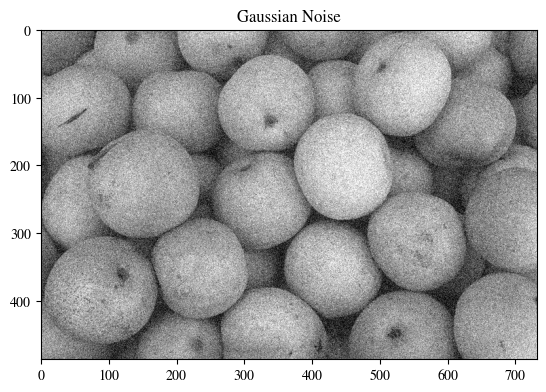

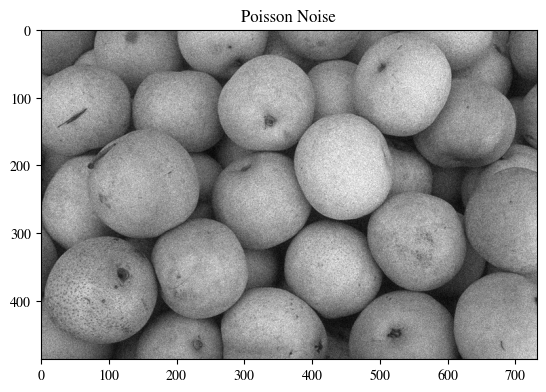

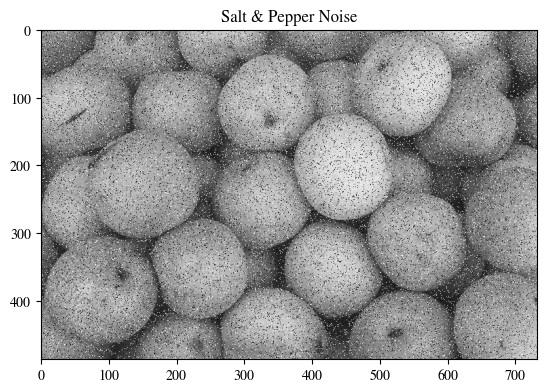

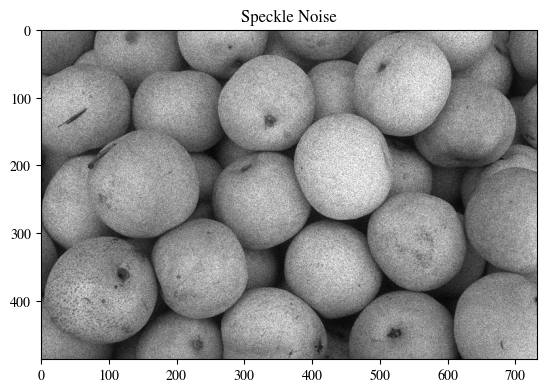

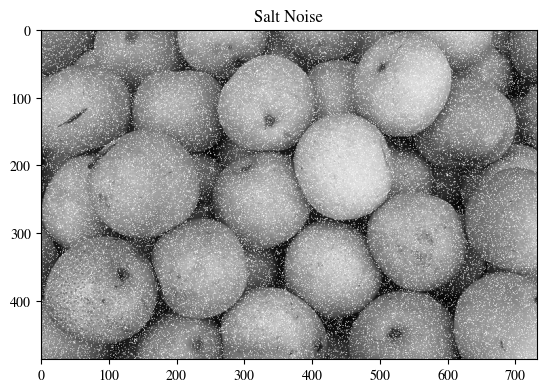

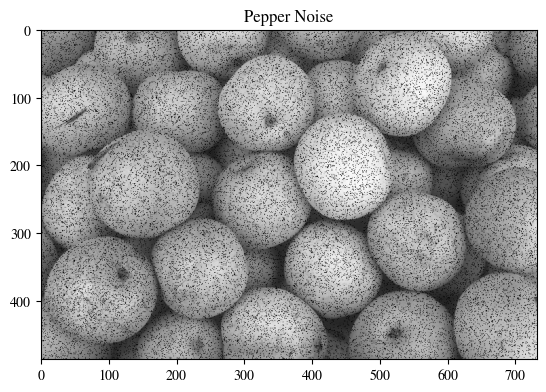

In [3]:
"""
Corrupt the input images with different types of noise models such as:-
1.	'Gaussian'
2.	'poisson'
3.	'salt & pepper'
4.	'speckle'
5.	Salt only noise
6.	Pepper only noise

You may use the skimage.util.random_noise function from scikit image library.
"""

from skimage.util import random_noise

img = cv2.imread("lab6_pears.png", cv2.IMREAD_GRAYSCALE)

gaussian = random_noise(img, mode="gaussian", var=0.01)
poisson = random_noise(img, mode="poisson")
salt_pepper = random_noise(img, mode="s&p", amount=0.1)
speckle = random_noise(img, mode="speckle")
salt = random_noise(img, mode="salt", amount=0.1)
pepper = random_noise(img, mode="pepper", amount=0.1)

# Stix
plt.rcParams["font.family"] = "STIXGeneral"
for i, noise in zip(
    ["Gaussian", "Poisson", "Salt & Pepper", "Speckle", "Salt", "Pepper"],
    [gaussian, poisson, salt_pepper, speckle, salt, pepper],
):
    plt.imshow(noise, cmap="gray")
    plt.title(f"{i} Noise")
    plt.show()

### Lab Task 3

In [66]:
"""
Apply different kinds of noise removal filters as given below.
1.	Arithmetic mean
2.	Geometric mean
3.	Harmonic mean
4.	Contra harmonic mean, the contra harmonic mean filter is used for filtering 
    an image with either salt or pepper noise (but not both).
5.	Max filters
6.	Min filters
"""

import scipy.ndimage as ndimage

img = cv2.imread("lab6_pears.png", cv2.IMREAD_GRAYSCALE)

gaussian = random_noise(img, mode="gaussian", var=0.01)
poisson = random_noise(img, mode="poisson")
salt_pepper = random_noise(img, mode="s&p", amount=0.1)
speckle = random_noise(img, mode="speckle")
salt = random_noise(img, mode="salt", amount=0.1)
pepper = random_noise(img, mode="pepper", amount=0.1)

# Arithmetic mean
arithmetic_mean = ndimage.uniform_filter(gaussian, size=3)

# Geometric mean
kernel_size = 3
geometric_mean = cv2.pow(
    cv2.GaussianBlur(gaussian, (kernel_size, kernel_size), 0), 1.0 / kernel_size
)

# Harmonic mean
def harmonic_mean(img, size):
    num = img.size
    denom = 1 / (img + np.finfo(float).eps)
    kernel = np.ones(size)
    result = num / cv2.filter2D(denom, -1, kernel)
    return result

harmonic_mean = harmonic_mean(gaussian, (3, 3))

# Contra harmonic mean
def contraharmonic_mean(img, size, Q):
    num = np.power(img, Q + 1)
    denom = np.power(img, Q)
    kernel = np.ones(size)
    result = cv2.filter2D(num, -1, kernel) / cv2.filter2D(denom, -1, kernel)
    return result

window_size = (3, 3)

contra_harmonic_salt = contraharmonic_mean(salt, window_size, -1)
contra_harmonic_pepper = contraharmonic_mean(pepper, window_size, 1)

# Max filter
max_filter = ndimage.maximum_filter(pepper, size=3)

# Min filter
min_filter = ndimage.minimum_filter(salt, size=3)

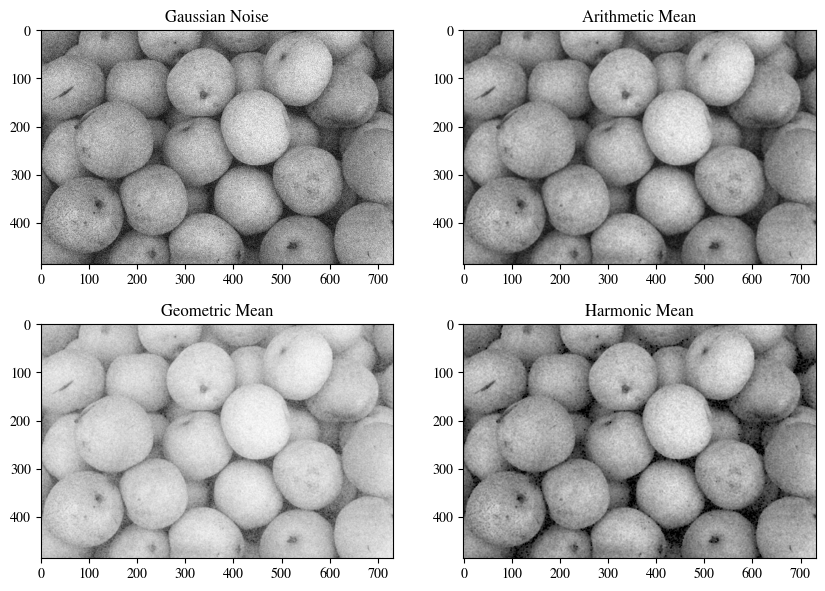

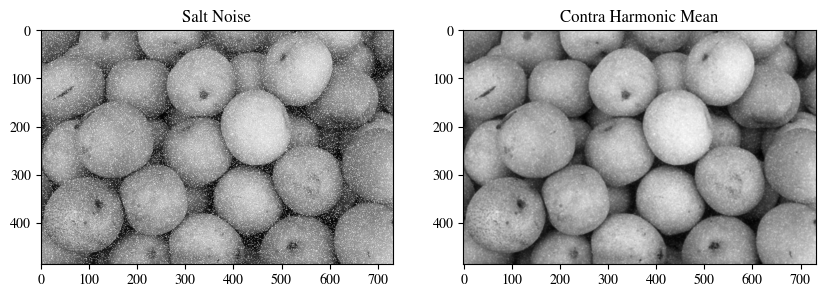

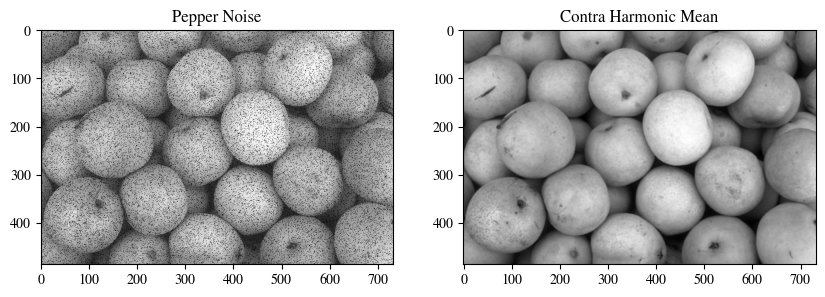

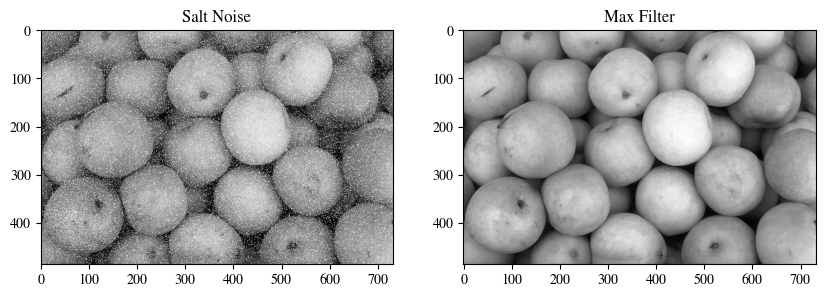

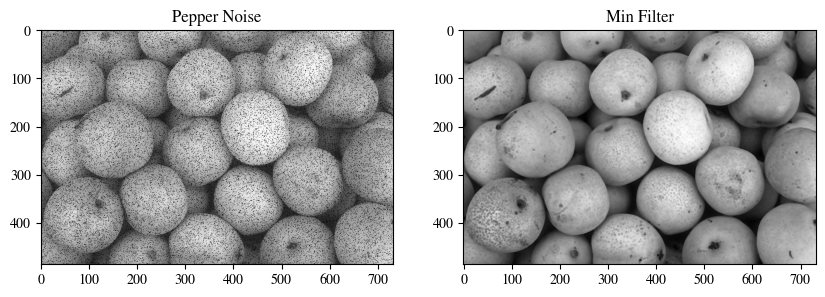

In [67]:
# Stix
plt.rcParams["font.family"] = "STIXGeneral"

# Gaussian and Arithmetic, Geometric, and Harmonic mean
fig, ax = plt.subplots(2, 2, figsize=(10, 7))
ax[0, 0].imshow(gaussian, cmap="gray")
ax[0, 0].set_title("Gaussian Noise")
ax[0, 1].imshow(arithmetic_mean, cmap="gray")
ax[0, 1].set_title("Arithmetic Mean")
ax[1, 0].imshow(geometric_mean, cmap="gray")
ax[1, 0].set_title("Geometric Mean")
ax[1, 1].imshow(harmonic_mean, cmap="gray")
ax[1, 1].set_title("Harmonic Mean")
plt.show()

# Salt and Contra Harmonic
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(salt, cmap="gray")
ax[0].set_title("Salt Noise")
ax[1].imshow(contra_harmonic_salt, cmap="gray")
ax[1].set_title("Contra Harmonic Mean")
plt.show()

# Pepper and Contra Harmonic
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(pepper, cmap="gray")
ax[0].set_title("Pepper Noise")
ax[1].imshow(contra_harmonic_pepper, cmap="gray")
ax[1].set_title("Contra Harmonic Mean")
plt.show()

# Salt and Max
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(salt, cmap="gray")
ax[0].set_title("Salt Noise")
ax[1].imshow(max_filter, cmap="gray")
ax[1].set_title("Max Filter")
plt.show()

# Pepper and Min
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(pepper, cmap="gray")
ax[0].set_title("Pepper Noise")
ax[1].imshow(min_filter, cmap="gray")
ax[1].set_title("Min Filter")
plt.show()